O conjunto de dados sobre seguros de saúde. Neste projeto será feito, uma análise exploratória, e modelo de machine learning de regressão, utilizando o algoritmo de regressão linear.

Link dataset: https://www.kaggle.com/datasets/annetxu/health-insurance-cost-prediction

Os dados carregados contêm as seguintes colunas:

age: Idade do beneficiário primário.

sex: Sexo do beneficiário (male/female).

bmi: Índice de massa corporal (Body Mass Index).

children: Número de dependentes/crianças cobertos pelo seguro de saúde.

smoker: Se o beneficiário é fumante ou não (yes/no).

region: Região residencial do beneficiário nos EUA (northeast, southeast, etc.).
  
charges: Custos médicos individuais cobrados pelo seguro de saúde.

In [11]:
import pandas as pd

# Carregar os dados
df = pd.read_csv("/content/drive/MyDrive/Dataset Seguro Saude/insurance.csv")

# Visualizar as primeiras linhas da tabela
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Verificando valores ausentes
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Nâo temos valores ausentes em nenhuma das colunas.

In [ ]:
# Obtendo estatísticas descritivas
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Temos 1338 entradas no conjunto de dados.

A coluna "sex" tem dois valores únicos (male/female).

A coluna "smoker" tem dois valores únicos (yes/no).

A coluna "region" tem quatro valores únicos.

A idade varia de 18 a 64 anos.

O índice de massa corporal (BMI) varia de 15,96 a 53,13.

O número de filhos varia de 0 a 5.

As cobranças (charges) variam de 1121,87 a 63770,43.

Alguns gráficos para visualizar a distribuição e as relações entre as variáveis.    

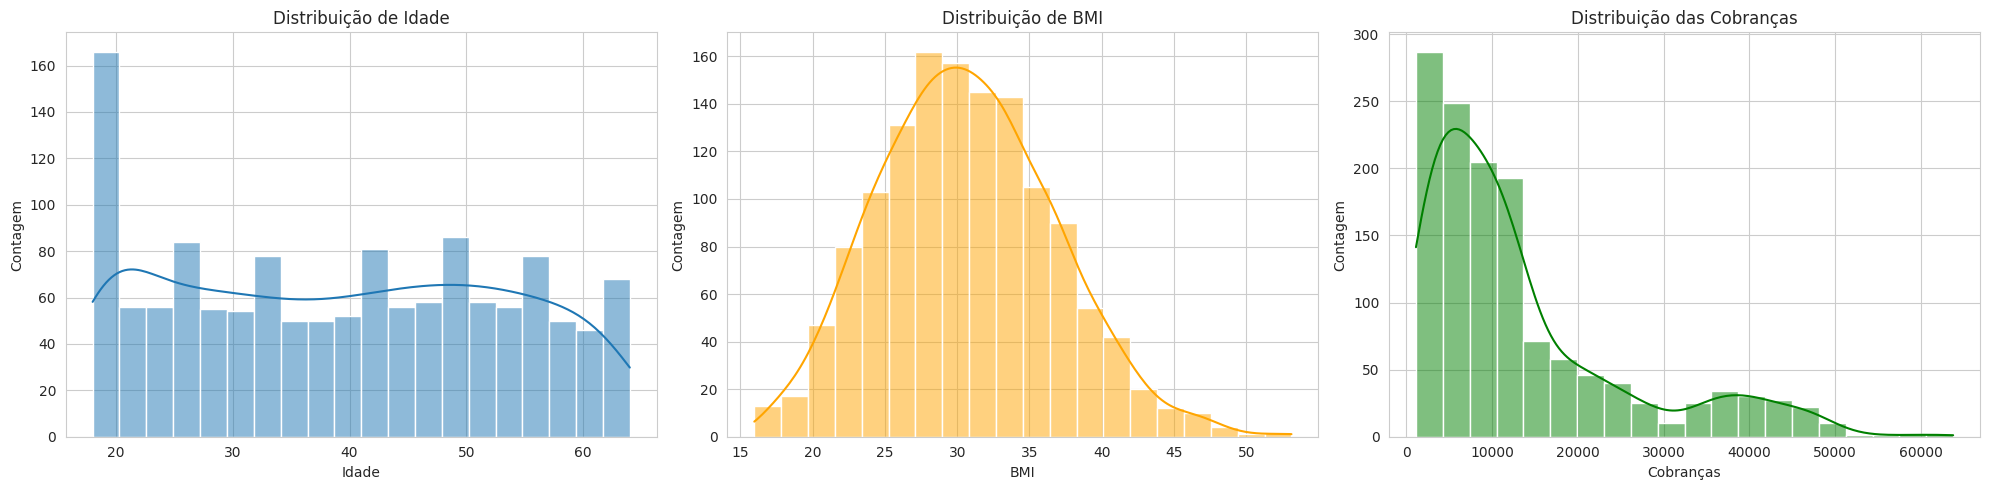

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações dos gráficos
sns.set_style("whitegrid")
plt.figure(figsize=(20, 5))

# Distribuição de idade
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Distribuição de BMI
plt.subplot(1, 3, 2)
sns.histplot(df['bmi'], kde=True, bins=20, color='orange')
plt.title('Distribuição de BMI')
plt.xlabel('BMI')
plt.ylabel('Contagem')

# Distribuição das cobranças
plt.subplot(1, 3, 3)
sns.histplot(df['charges'], kde=True, bins=20, color='green')
plt.title('Distribuição das Cobranças')
plt.xlabel('Cobranças')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Distribuição de Idade: A distribuição de idade parece ser quase uniforme, exceto por um pico mais pronunciado na faixa de 18-20 anos. Isso pode indicar um maior número de jovens entrando no mercado de seguros ou apenas uma característica da amostra.

Distribuição de BMI (Índice de Massa Corporal): A distribuição de BMI é aproximadamente normal, centrada em torno de 30. Um BMI de 30 e acima é geralmente considerado obeso, o que sugere que muitos indivíduos na amostra estão na faixa de obesidade ou acima dela.

Distribuição das Cobranças: A maioria das cobranças está concentrada na faixa inferior, com um pico em torno de 10.000. No entanto, também há uma distribuição de longa cauda à direita, indicando que alguns indivíduos têm cobranças muito mais altas. Isso pode ser devido a condições médicas específicas, estilo de vida ou outros fatores.

A matriz de correlação nos ajuda a entender a relação linear entre variáveis numéricas. Quanto mais próximo o valor de correlação estiver de 1 ou -1, mais forte é a relação positiva ou negativa, respectivamente, entre as duas variáveis.

In [ ]:
# Calculando a matriz de correlação
df.corr()

<ipython-input-9-a707b1dd92fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-10-9e8949904b82>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)


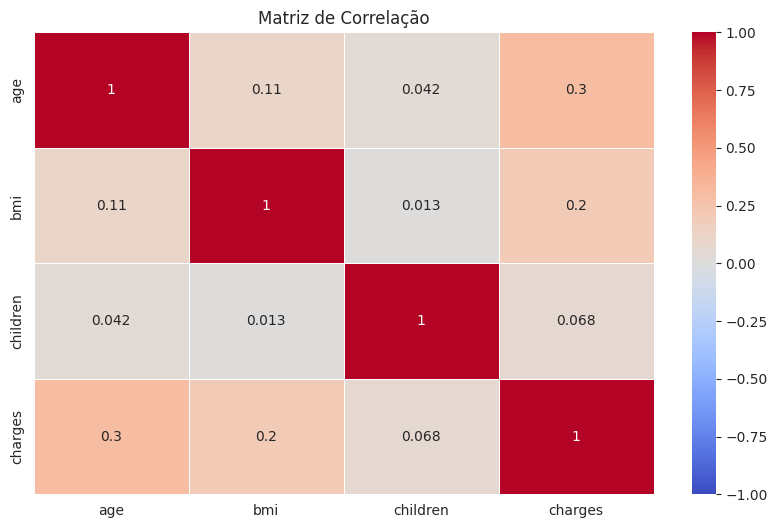

In [ ]:
# Visualizando a matriz de correlação usando um mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

A matriz de correlação mostra as seguintes relações entre as variáveis numéricas:

age (Idade): Correlação positiva com charges (0.299): Isso sugere que, à medida que a idade aumenta, os custos do seguro também tendem a aumentar.

bmi (Índice de Massa Corporal): Correlação positiva com charges (0.198): Isso indica que pessoas com um BMI mais alto tendem a ter custos de seguro mais altos, embora a relação não seja tão forte quanto a idade.

children (Crianças): Correlação muito fraca com charges (0.068): Isso sugere que o número de filhos não tem uma influência forte nos custos do seguro neste conjunto de dados.

Criar um modelo preditivo de regressão, utilizando o algoritmo de regressão linear.

Converta variáveis categóricas em numéricas, divida os dados em conjuntos de treinamento e teste, e normalize os dados (se necessário).

In [12]:
# Dividir os dados em conjuntos de entrada (X) e saída (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Pré-processar os dados com transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape


((1070, 6), (268, 6))


Os dados foram divididos em conjuntos de treinamento e teste. O conjunto de treinamento possui 1070 amostras, enquanto o conjunto de teste contém 268 amostras.

Iremos construir e treinar o modelo de regressão linear usando o conjunto de treinamento.

In [14]:
from sklearn.linear_model import LinearRegression

# Criar e treinar o modelo de regressão linear
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

O modelo de regressão linear foi treinado com sucesso.

Agora, vamos avaliar o desempenho do modelo usando métricas de regressão, como R² (coeficiente de determinação), o erro médio quadrático (MSE) e a raiz do erro médio quadrático (RMSE).

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Fazer previsões com o modelo
y_pred = model.predict(X_test)

# Calcular métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

r2, mse, rmse

(0.7999876970680434, 31827950.229523834, 5641.62655885019)

As métricas de avaliação para o modelo de regressão linear:

Erro Médio Quadrático (MSE): 31,827,950.23

Raiz do Erro Médio Quadrático (RMSE): 5,641.63

Coeficiente de Determinação (R²): 0.7999 - Isso indica que aproximadamente 80% da variabilidade da variável resposta (charges) é explicada pelo modelo.

Agora, vamos analisar as variáveis mais significativas para o algoritmo. Isso pode ser feito verificando os coeficientes do modelo de regressão linear. Coeficientes com magnitudes maiores indicam variáveis mais influentes.

In [17]:
# Obter os nomes das características após o pré-processamento (one-hot encoding)
features = num_features + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_features))

# Obter os coeficientes do modelo
coefficients = model.named_steps['regressor'].coef_

# Criar um DataFrame para visualizar os coeficientes
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df

,Feature,Coefficient
4,smoker_yes,23605.017267
0,age,3572.518752
1,bmi,2077.457940
2,children,528.603986
3,sex_male,-15.463728
5,region_northwest,-260.132732
7,region_southwest,-761.948706
6,region_southeast,-913.278834


Os coeficientes do modelo de regressão linear para cada variável são os seguintes:

smoker_yes: ($23,605.02) Ser fumante tem o impacto mais significativo nos custos do seguro, aumentando-os substancialmente em relação aos não fumantes.

age: ($3,572.52) A idade é a segunda variável mais impactante, indicando que os custos do seguro tendem a aumentar com a idade.

bmi: ($2,077.46) O índice de massa corporal também tem um impacto significativo, com custos de seguro aumentando com o aumento do BMI.

children: ($528.60) O número de filhos ou dependentes tem um impacto menor nos custos em comparação com as três primeiras variáveis.

sex_male: (-$15.46) O gênero tem um impacto quase insignificante nos custos do seguro, com homens tendendo a pagar ligeiramente menos.

region_northwest: (-$260.13) Viver na região noroeste tem um pequeno impacto negativo nos custos em comparação com a região nordeste (referência).

region_southwest: (-$761.95) Viver na região sudoeste tem um impacto negativo mais substancial nos custos em comparação com a região nordeste.

region_southeast: (-$913.28) A região sudeste tem o impacto negativo mais substancial nos custos em comparação com a região nordeste.

Conclusões

A variável mais impactante nos custos do seguro é se a pessoa é fumante ou não. Fumantes tendem a ter custos de seguro significativamente mais altos do que não fumantes.

A idade e o índice de massa corporal (BMI) também desempenham papéis importantes na determinação dos custos do seguro.

A região em que uma pessoa vive e o gênero têm impactos menores nos custos.

É importante observar que estes insights são específicos deste conjunto de dados e do modelo de regressão linear. Em diferentes contextos ou com diferentes modelos, as conclusões podem variar.